# Analysis of Iowa liquor sales data set

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import iplot
import datetime
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
# Reading csv file
df=pd.read_csv("Iowa_Liquor_Sales.csv")
df.head(5)

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,INV-46142600002,04/03/2022,3842,BANCROFT LIQUOR STORE,107 N PORTLAND ST PO BX 222,BANCROFT,50517.0,POINT (-94.218 43.29356),55.0,KOSSUTH,...,73053,RUMCHATA,6,1000,17.00,25.50,6,153.00,6.0,1.58
1,INV-46142600006,04/03/2022,3842,BANCROFT LIQUOR STORE,107 N PORTLAND ST PO BX 222,BANCROFT,50517.0,POINT (-94.218 43.29356),55.0,KOSSUTH,...,38177,TITOS HANDMADE VODKA,12,1000,13.17,19.76,24,474.24,24.0,6.34
2,INV-46142100001,04/03/2022,5941,PRIME MART - CEDAR FALLS,2728 CENTER ST,CEDAR FALLS,50613.0,POINT (-92.455972 42.561054),7.0,BLACK HAWK,...,4381,BALVENIE 21YR PORTWOOD,3,750,150.00,225.00,2,450.00,1.5,0.39
3,INV-46142400009,04/03/2022,4129,CYCLONE LIQUORS,626 LINCOLN WAY,AMES,50010.0,POINT (-93.618289 42.022865),85.0,STORY,...,34457,KETEL ONE,12,1000,15.16,22.74,60,1364.40,60.0,15.85
4,INV-46142400014,04/03/2022,4129,CYCLONE LIQUORS,626 LINCOLN WAY,AMES,50010.0,POINT (-93.618289 42.022865),85.0,STORY,...,31470,NEW AMSTERDAM GIN,12,1000,7.33,11.00,4,44.00,4.0,1.05


In [5]:
# Info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321869 entries, 0 to 1321868
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Invoice/Item Number    1321869 non-null  object 
 1   Date                   1321869 non-null  object 
 2   Store Number           1321869 non-null  int64  
 3   Store Name             1321869 non-null  object 
 4   Address                1320163 non-null  object 
 5   City                   1320163 non-null  object 
 6   Zip Code               1320163 non-null  float64
 7   Store Location         1194075 non-null  object 
 8   County Number          764242 non-null   float64
 9   County                 1320163 non-null  object 
 10  Category               1321869 non-null  int64  
 11  Category Name          1321869 non-null  object 
 12  Vendor Number          1321869 non-null  int64  
 13  Vendor Name            1321869 non-null  object 
 14  Item Number       

In [6]:
# To understand the numerical data we use describe function
df.describe()

,Store Number,Zip Code,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
count,1.321869e+06,1.320163e+06,764242.000000,1.321869e+06,1.321869e+06,1.321869e+06,1.321869e+06,1.321869e+06,1.321869e+06,1.321869e+06,1.321869e+06,1.321869e+06,1.321869e+06,1.321869e+06
mean,4.295050e+03,5.123815e+04,56.947370,1.060074e+06,3.058074e+02,5.603678e+04,1.184840e+01,8.047798e+02,1.205515e+01,1.808467e+01,1.191745e+01,1.660990e+02,9.218326e+00,2.429536e+00
std,1.389249e+03,9.931705e+02,27.223192,1.141456e+05,1.534359e+02,9.592006e+04,7.848656e+00,5.274858e+02,1.473162e+01,2.209740e+01,3.480757e+01,5.298695e+02,4.214381e+01,1.113342e+01
min,2.106000e+03,5.000200e+04,1.000000,1.011100e+06,3.500000e+01,2.580000e+02,1.000000e+00,2.000000e+01,8.900000e-01,1.340000e+00,-2.400000e+02,-3.375000e+03,-1.560000e+02,-4.121000e+01
25%,2.650000e+03,5.031400e+04,31.000000,1.012300e+06,2.590000e+02,2.754400e+04,6.000000e+00,3.750000e+02,6.000000e+00,9.000000e+00,3.000000e+00,4.500000e+01,1.500000e+00,3.900000e-01
50%,4.319000e+03,5.103400e+04,62.000000,1.031200e+06,2.970000e+02,3.986800e+04,1.200000e+01,7.500000e+02,9.060000e+00,1.359000e+01,6.000000e+00,9.036000e+01,4.500000e+00,1.180000e+00
75%,5.443000e+03,5.230200e+04,77.000000,1.071000e+06,4.210000e+02,6.683600e+04,1.200000e+01,1.000000e+03,1.498000e+01,2.247000e+01,1.200000e+01,1.710000e+02,9.600000e+00,2.530000e+00
max,1.005700e+04,5.722200e+04,99.000000,1.901200e+06,9.780000e+02,9.999950e+05,6.000000e+01,5.250000e+03,2.298840e+03,3.448260e+03,7.260000e+03,1.304160e+05,8.736000e+03,2.307800e+03


## DATA CLEANING

In [7]:
# Counting number of null values in each column
df.isna().sum()

Invoice/Item Number           0
Date                          0
Store Number                  0
Store Name                    0
Address                    1706
City                       1706
Zip Code                   1706
Store Location           127794
County Number            557627
County                     1706
Category                      0
Category Name                 0
Vendor Number                 0
Vendor Name                   0
Item Number                   0
Item Description              0
Pack                          0
Bottle Volume (ml)            0
State Bottle Cost             0
State Bottle Retail           0
Bottles Sold                  0
Sale (Dollars)                0
Volume Sold (Liters)          0
Volume Sold (Gallons)         0
dtype: int64

In [8]:
# Caluculating the percentage of missing data
actual_rows=df.shape[0]
print("Address : ",df['Address'].isna().sum()*100/actual_rows)
print("City : ",df['City'].isna().sum()*100/actual_rows)
print("Zip Code : ",df['Zip Code'].isna().sum()*100/actual_rows)
print("Store Location : ",df['Store Location'].isna().sum()*100/actual_rows)
print("County Number : ",df['County Number'].isna().sum()*100/actual_rows)
print("County : ",df['County'].isna().sum()*100/actual_rows)

Address :  0.12905968745768304
City :  0.12905968745768304
Zip Code :  0.12905968745768304
Store Location :  9.667675087319545
County Number :  42.184739940190745
County :  0.12905968745768304


##### Missing value percentage of column country number is 42.18 %. If we drop rows than we will miss almost half of the data, as we know the address of the store by other column, this row doesn't have that much importance.So, we are droping Country Number column.

In [9]:
# droping column
df.drop('County Number',axis=1,inplace=True)

In [10]:
#droping null rows
df.drop('Store Location',axis=1,inplace=True)
df=df.dropna()
df.isna().sum()

Invoice/Item Number      0
Date                     0
Store Number             0
Store Name               0
Address                  0
City                     0
Zip Code                 0
County                   0
Category                 0
Category Name            0
Vendor Number            0
Vendor Name              0
Item Number              0
Item Description         0
Pack                     0
Bottle Volume (ml)       0
State Bottle Cost        0
State Bottle Retail      0
Bottles Sold             0
Sale (Dollars)           0
Volume Sold (Liters)     0
Volume Sold (Gallons)    0
dtype: int64

In [11]:
# Finding percentage of data loss with no imputation
rows_after_clean=df.shape[0]
print("Percentage of data loss with no imputation",(actual_rows-rows_after_clean)*100/actual_rows)

Percentage of data loss with no imputation 0.12905968745768304


###### By this way we can analyze and train model with accurate information.

## DATA ANALYSIS WITH HELP OF DATA VISULIZATION

In [12]:
# finding categrical and numerical columns
categorical_col = []
for col, value in df.iteritems():
    if value.dtypes == 'object':
        categorical_col.append(col)
numerical_col = df.columns.difference(categorical_col)

In [13]:
df_numerical_col = df[numerical_col]
print(df_numerical_col.head())
df_summary = df.describe()

   Bottle Volume (ml)  Bottles Sold  Category  Item Number  Pack  \
0                1000             6   1081200        73053     6   
1                1000            24   1031100        38177    12   
2                 750             2   1012200         4381     3   
3                1000            60   1032100        34457    12   
4                1000             4   1041100        31470    12   

   Sale (Dollars)  State Bottle Cost  State Bottle Retail  Store Number  \
0          153.00              17.00                25.50          3842   
1          474.24              13.17                19.76          3842   
2          450.00             150.00               225.00          5941   
3         1364.40              15.16                22.74          4129   
4           44.00               7.33                11.00          4129   

   Vendor Number  Volume Sold (Gallons)  Volume Sold (Liters)  Zip Code  
0            205                   1.58                   6.0   50

In [14]:
def plot_axvlines(plot, column):
    mean = df_summary.loc["mean", column]
    q1 = df_summary.loc["25%", column]
    q2 = df_summary.loc["50%", column]
    q3 = df_summary.loc["75%", column]
    plot.axvline(mean, color = "g");              # Plotting a line to mark the mean 
    plot.axvline(q1, color = "b");                # Plotting a line to mark Q1 
    plot.axvline(q2, color = "purple");             # Plotting a line to mark Q2 
    plot.axvline(q3, color = "red");           # Plotting a line to mark Q3
    plot.legend({"Mean": mean, "25%" : q1, "50%" : q2, "75%" : q3});

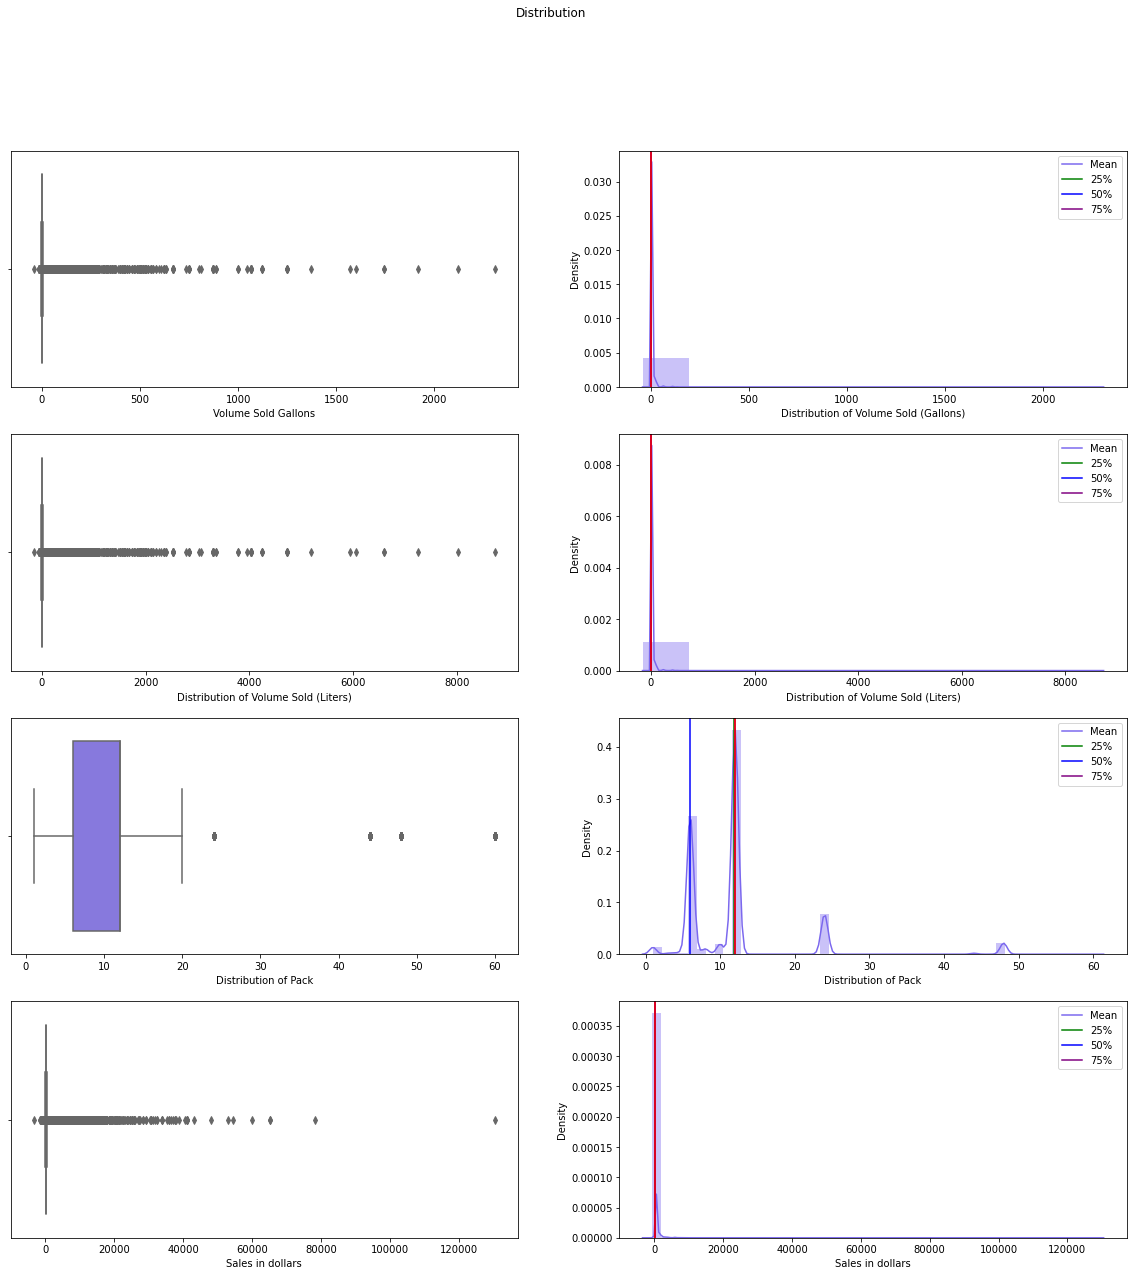

In [15]:
# ploting boxplot and distribution plot 
fig, axes = plt.subplots(4, 2, figsize = (20,20));
fig.suptitle('Distribution');

# plot for Volume Sold (Gallons) 
sns.boxplot(df_numerical_col["Volume Sold (Gallons)"], ax = axes[0][0], color = "mediumslateblue");
axes[0][0].set(xlabel = 'Volume Sold Gallons');

pltt = sns.distplot(df_numerical_col["Volume Sold (Gallons)"], ax = axes[0][1], bins = 10, color = "mediumslateblue");
axes[0][1].set(xlabel = 'Distribution of Volume Sold (Gallons)');
plot_axvlines(pltt, "Volume Sold (Gallons)");

# plot for Volume Sold (Liters)
sns.boxplot(df_numerical_col["Volume Sold (Liters)"], ax = axes[1][0], color = "mediumslateblue");
axes[1][0].set(xlabel = 'Distribution of Volume Sold (Liters)');

pltt = sns.distplot(df_numerical_col["Volume Sold (Liters)"], ax = axes[1][1], bins = 10, color = "mediumslateblue");
axes[1][1].set(xlabel = 'Distribution of Volume Sold (Liters)');
plot_axvlines(pltt, "Volume Sold (Liters)")

# plot for Pack
sns.boxplot(df_numerical_col["Pack"], ax = axes[2][0], color = "mediumslateblue");
axes[2][0].set(xlabel = 'Distribution of Pack');

pltt = sns.distplot(df_numerical_col["Pack"], ax = axes[2][1], color = "mediumslateblue");
axes[2][1].set(xlabel = 'Distribution of Pack');
plot_axvlines(pltt, "Pack")

#plot for Sale (Dollars)
sns.boxplot(df_numerical_col["Sale (Dollars)"], ax = axes[3][0], color = "mediumslateblue");
axes[3][0].set(xlabel = 'Sales in dollars');

pltt = sns.distplot(df_numerical_col["Sale (Dollars)"], ax = axes[3][1], color = "mediumslateblue");
axes[3][1].set(xlabel = 'Sales in dollars');
plot_axvlines(pltt, "Sale (Dollars)")

In [16]:
# Adding profit column with the help of other columns
df['Profit (Dollars)'] = df['Sale (Dollars)']-(df['Bottles Sold']*df['State Bottle Cost'])

In [17]:
# Adding date and month columns
df['date_without_time']=pd.to_datetime(df['Date']).dt.date
df['month']=df.apply(lambda a : datetime.datetime.strptime(str(a.date_without_time),'%Y-%m-%d').month ,axis=1)
month_name=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df['month']=df.apply(lambda a: month_name[a['month']-1],axis=1)

## Find the best liquor category


In [18]:
# Finding unique liquor categories
print("Total liquor categories in Iowa government are ",len(df['Category Name'].unique()))

Total liquor categories in Iowa government are  53


In [19]:
# Findind best liquor based on total volumn sold 
df_best_liquor_volume = df.groupby(['Category Name'])['Volume Sold (Gallons)'].sum().sort_values(ascending=False).reset_index().rename(columns={'Volume Sold (Gallons)':'Total Volume Sold (Gallons)'})
df_best_liquor_volume.head(5)

,Category Name,Total Volume Sold (Gallons)
0,AMERICAN VODKAS,784091.48
1,CANADIAN WHISKIES,373597.59
2,STRAIGHT BOURBON WHISKIES,172084.27
3,SPICED RUM,165305.31
4,WHISKEY LIQUEUR,149714.06


### American vodkas is best sold liquor among all other, in 6 months it sold 784091.48 gallons

In [20]:
# Finding best category ;iquor based on total sale
df_best_liquor_price = df.groupby(['Category Name'])['Sale (Dollars)'].sum().sort_values(ascending=False).reset_index().rename(columns={'Sale (Dollars)':'Total Sale (Dollars)'})
df_best_liquor_price.head(5)

,Category Name,Total Sale (Dollars)
0,AMERICAN VODKAS,33458563.66
1,CANADIAN WHISKIES,22146655.18
2,STRAIGHT BOURBON WHISKIES,17532169.08
3,100% AGAVE TEQUILA,14599192.10
4,WHISKEY LIQUEUR,12975060.91


### american vodkas total sale is more

In [21]:
#  Best category based which bottle sold most
df_best_liquor_bottel_volume = df.groupby(['Category Name','Bottle Volume (ml)'])['Bottles Sold'].sum().sort_values(ascending=False).reset_index().rename(columns={'Bottles Sold':'Total Bottles Sold'})
df_best_liquor_bottel_volume.head(5)

,Category Name,Bottle Volume (ml),Total Bottles Sold
0,WHISKEY LIQUEUR,100,1141772
1,AMERICAN VODKAS,1750,883402
2,AMERICAN VODKAS,375,737393
3,AMERICAN VODKAS,750,707985
4,AMERICAN VODKAS,1000,560689


### Whiskey Liqueur 100 ml bottle is the top liquor bottle sold in the last six months.

In [22]:
# Finding best liquor by its profit 
df_best_liquor_Profit = df.groupby(['Category Name'])['Profit (Dollars)'].sum().sort_values(ascending=False).reset_index().rename(columns={'Profit (Dollars)':'Total Profit (Dollars)'})
df_best_liquor_Profit.head(5)

,Category Name,Total Profit (Dollars)
0,AMERICAN VODKAS,11142611.56
1,CANADIAN WHISKIES,7364551.16
2,STRAIGHT BOURBON WHISKIES,5836995.17
3,100% AGAVE TEQUILA,4815932.83
4,WHISKEY LIQUEUR,4319475.17


In [23]:
# Find best liquor category basedbon bottle volumn and total sale
df_best_liquor_bottel_price = df.groupby(['Category Name','Bottle Volume (ml)'])['Sale (Dollars)'].sum().sort_values(ascending=False).reset_index().rename(columns={'Sale (Dollars)':'Total Sale (Dollars)'})
df_best_liquor_bottel_price.head(5)

,Category Name,Bottle Volume (ml),Total Sale (Dollars)
0,AMERICAN VODKAS,1750,14797699.99
1,100% AGAVE TEQUILA,750,11797513.78
2,STRAIGHT BOURBON WHISKIES,750,11495291.67
3,CANADIAN WHISKIES,1750,9033251.90
4,AMERICAN VODKAS,1000,7126845.03


In [24]:
#Find best liquor category basedbon bottle volumn and total sale
df_best_liquor_bottel_Profit = df.groupby(['Category Name','Bottle Volume (ml)'])['Profit (Dollars)'].sum().sort_values(ascending=False).reset_index().rename(columns={'Profit (Dollars)':'Total Profit (Dollars)'})
df_best_liquor_bottel_Profit.head(5)

,Category Name,Bottle Volume (ml),Total Profit (Dollars)
0,AMERICAN VODKAS,1750,4931129.98
1,100% AGAVE TEQUILA,750,3886514.94
2,STRAIGHT BOURBON WHISKIES,750,3825859.28
3,CANADIAN WHISKIES,1750,2997656.12
4,AMERICAN VODKAS,1000,2374921.02


## Find which store or vendor buys more liquor monthly

In [25]:
# find total number of vendors
print("The total number of vendors for the Iowa government is  ",len(df['Vendor Name'].unique()))

The total number of vendors for the Iowa government is   209


In [26]:
# Find best vendor by total volume sold
df_best_vendor_volume = df.groupby(['Vendor Name'])['Volume Sold (Gallons)'].sum().sort_values(ascending=False).reset_index().rename(columns={'Volume Sold (Gallons)':'Total Volume Sold (Gallons)'})
df_best_vendor_volume.head(5)

,Vendor Name,Total Volume Sold (Gallons)
0,SAZERAC COMPANY INC,614944.75
1,DIAGEO AMERICAS,446464.46
2,HEAVEN HILL BRANDS,309772.83
3,LUXCO INC,252408.60
4,JIM BEAM BRANDS,216185.85


### SAZERAC COMPANY INC has been the best vendor in the last six months based on the total volume sold.

In [27]:
# Find best vendor every month by total volume sold
df_best_Vendor_bottel_volume_montly = df.groupby(['Vendor Name','month'])['Volume Sold (Gallons)'].sum().sort_values(ascending=False).reset_index().rename(columns={'Volume Sold (Gallons)':'Total Volume Sold (Gallons)'})
df_best_Vendor_bottel_volume_montly1= pd.DataFrame()
for i in month_name:
    df3=df_best_Vendor_bottel_volume_montly[(df_best_Vendor_bottel_volume_montly.month== i)]
    df4=df3[(df3['Total Volume Sold (Gallons)']==df3['Total Volume Sold (Gallons)'].max())]
    df_best_Vendor_bottel_volume_montly1=pd.concat([df_best_Vendor_bottel_volume_montly1,df4],axis=0)
df_best_Vendor_bottel_volume_montly1=df_best_Vendor_bottel_volume_montly1.drop_duplicates()
df_best_Vendor_bottel_volume_montly1

,Vendor Name,month,Total Volume Sold (Gallons)
1,SAZERAC COMPANY INC,Apr,109248.58
4,SAZERAC COMPANY INC,May,102959.12
3,SAZERAC COMPANY INC,Jun,103316.79
6,SAZERAC COMPANY INC,Jul,81324.40
0,SAZERAC COMPANY INC,Aug,112261.47
2,SAZERAC COMPANY INC,Sep,105834.39


### In all 6 months, SAZERAC COMPANY INC has been the best vendor based on the total volume sold.

In [28]:
# Find best vendor by total sales
df_best_Vendor_price = df.groupby(['Vendor Name'])['Sale (Dollars)'].sum().sort_values(ascending=False).reset_index().rename(columns={'Sale (Dollars)':'Total Sale (Dollars)'})
df_best_Vendor_price.head(5)

,Vendor Name,Total Sale (Dollars)
0,DIAGEO AMERICAS,42621716.99
1,SAZERAC COMPANY INC,30719884.54
2,JIM BEAM BRANDS,15582104.72
3,FIFTH GENERATION INC,15281528.76
4,HEAVEN HILL BRANDS,13461285.78


### DIAGEO AMERICAS has been the best vendor in the last six months based on the total sales.

In [29]:
# Find best vendor every month by total sales (dollars)
df_best_Vendor_price_volume_montly = df.groupby(['Vendor Name','month'])['Sale (Dollars)'].sum().sort_values(ascending=False).reset_index().rename(columns={'Sale (Dollars)':'Total Sale (Dollars)'})
df_best_Vendor_price_volume_montly1= pd.DataFrame()
for i in month_name:
    df3=df_best_Vendor_price_volume_montly[(df_best_Vendor_price_volume_montly.month== i)]
    df4=df3[(df3['Total Sale (Dollars)']==df3['Total Sale (Dollars)'].max())]
    df_best_Vendor_price_volume_montly1=pd.concat([df_best_Vendor_price_volume_montly1,df4],axis=0)
df_best_Vendor_price_volume_montly1=df_best_Vendor_price_volume_montly1.drop_duplicates()
df_best_Vendor_price_volume_montly1

,Vendor Name,month,Total Sale (Dollars)
4,DIAGEO AMERICAS,Apr,6724135.23
5,DIAGEO AMERICAS,May,6482388.15
2,DIAGEO AMERICAS,Jun,7106919.60
3,DIAGEO AMERICAS,Jul,6987366.78
0,DIAGEO AMERICAS,Aug,7686930.11
1,DIAGEO AMERICAS,Sep,7633977.12


### In all 6 months, DIAGEO AMERICAS has been the best vendor in the last six months based on the total sales.

In [30]:
# best vendor by total pr0fit gained by vendor
df_best_Vendor_Profit = df.groupby(['Vendor Name'])['Profit (Dollars)'].sum().sort_values(ascending=False).reset_index().rename(columns={'Profit (Dollars)':'Total Profit (Dollars)'})
df_best_Vendor_Profit.head(5)

,Vendor Name,Total Profit (Dollars)
0,DIAGEO AMERICAS,14124602.53
1,SAZERAC COMPANY INC,10219340.75
2,JIM BEAM BRANDS,5187617.17
3,FIFTH GENERATION INC,5094810.98
4,HEAVEN HILL BRANDS,4482280.99


### DIAGEO AMERICAS has been the best vendor in the last six months based on profit the vendor gained by selling liquor.

In [31]:
# best vendor every month based on total profit gained 
df_best_Vendor_Profit_volume_montly = df.groupby(['Vendor Name','month'])['Profit (Dollars)'].sum().sort_values(ascending=False).reset_index().rename(columns={'Profit (Dollars)':'Total Profit (Dollars)'})
df_best_Vendor_Profit_volume_montly1= pd.DataFrame()
for i in month_name:
    df3=df_best_Vendor_Profit_volume_montly[(df_best_Vendor_Profit_volume_montly.month== i)]
    df4=df3[(df3['Total Profit (Dollars)']==df3['Total Profit (Dollars)'].max())]
    df_best_Vendor_Profit_volume_montly1=pd.concat([df_best_Vendor_Profit_volume_montly1,df4],axis=0)
df_best_Vendor_Profit_volume_montly1=df_best_Vendor_Profit_volume_montly1.drop_duplicates()
df_best_Vendor_Profit_volume_montly1

,Vendor Name,month,Total Profit (Dollars)
4,DIAGEO AMERICAS,Apr,2240872.85
5,DIAGEO AMERICAS,May,2162832.90
3,DIAGEO AMERICAS,Jun,2292652.75
2,DIAGEO AMERICAS,Jul,2329754.59
0,DIAGEO AMERICAS,Aug,2563241.22
1,DIAGEO AMERICAS,Sep,2535248.22


### In all 6 months, DIAGEO AMERICAS has been the best vendor in the last six months based on profit the vendor gained by selling liquor.

In [32]:
# best vendor based on total bottles sold by each bottle types
df_best_Vendor_bottel_volume = df.groupby(['Vendor Name','Bottle Volume (ml)'])['Bottles Sold'].sum().sort_values(ascending=False).reset_index().rename(columns={'Bottles Sold':'Total Bottles Sold'})
df_best_Vendor_bottel_volume.head(5)

,Vendor Name,Bottle Volume (ml),Total Bottles Sold
0,SAZERAC COMPANY INC,100,1327811
1,DIAGEO AMERICAS,750,899321
2,SAZERAC COMPANY INC,1750,638290
3,SAZERAC COMPANY INC,1000,531870
4,SAZERAC COMPANY INC,750,507632


In [33]:
# best vendor based on total sales by each bottle types
df_best_Vendor_bottel_price = df.groupby(['Vendor Name','Bottle Volume (ml)'])['Sale (Dollars)'].sum().sort_values(ascending=False).reset_index().rename(columns={'Sale (Dollars)':'Total Sale (Dollars)'})
df_best_Vendor_bottel_price.head(5)

,Vendor Name,Bottle Volume (ml),Total Sale (Dollars)
0,DIAGEO AMERICAS,750,20597751.29
1,SAZERAC COMPANY INC,1750,8892022.84
2,DIAGEO AMERICAS,1000,8544747.72
3,DIAGEO AMERICAS,1750,8116831.18
4,JIM BEAM BRANDS,750,7672384.28


In [34]:
# best vendor based on total profit by each bottle types
df_best_Vendor_bottel_Profit = df.groupby(['Vendor Name','Bottle Volume (ml)'])['Profit (Dollars)'].sum().sort_values(ascending=False).reset_index().rename(columns={'Profit (Dollars)':'Total Profit (Dollars)'})
df_best_Vendor_bottel_Profit.head(5)

,Vendor Name,Bottle Volume (ml),Total Profit (Dollars)
0,DIAGEO AMERICAS,750,6826013.47
1,SAZERAC COMPANY INC,1750,2953450.38
2,DIAGEO AMERICAS,1000,2821595.18
3,DIAGEO AMERICAS,1750,2693486.48
4,JIM BEAM BRANDS,750,2551745.02


### Time series 

In [35]:
sns.set(rc={'figure.figsize':(11, 4)})

In [36]:
# using group by to find total volume sold, total sales and total profit
df_time_analysis = df.groupby(['date_without_time'])['Volume Sold (Gallons)','Profit (Dollars)','Sale (Dollars)'].sum().reset_index().rename(columns={'Volume Sold (Gallons)':'Total Volume Sold (Gallons)','Profit (Dollars)':'Total Profit (Dollars)','Sale (Dollars)':'Total Sale (Dollars)'})
df_time_analysis = df_time_analysis.set_index('date_without_time')
df_time_analysis.head(5)

,Total Volume Sold (Gallons),Total Profit (Dollars),Total Sale (Dollars)
date_without_time,,,
2022-04-03,154.05,4817.08,14447.65
2022-04-04,25649.74,582709.63,1747552.79
2022-04-05,24981.51,540072.33,1620025.76
2022-04-06,32406.52,711708.12,2134668.28
2022-04-07,32968.48,634669.72,1903474.73


Text(0, 0.5, 'Total Sale (Dollars)')

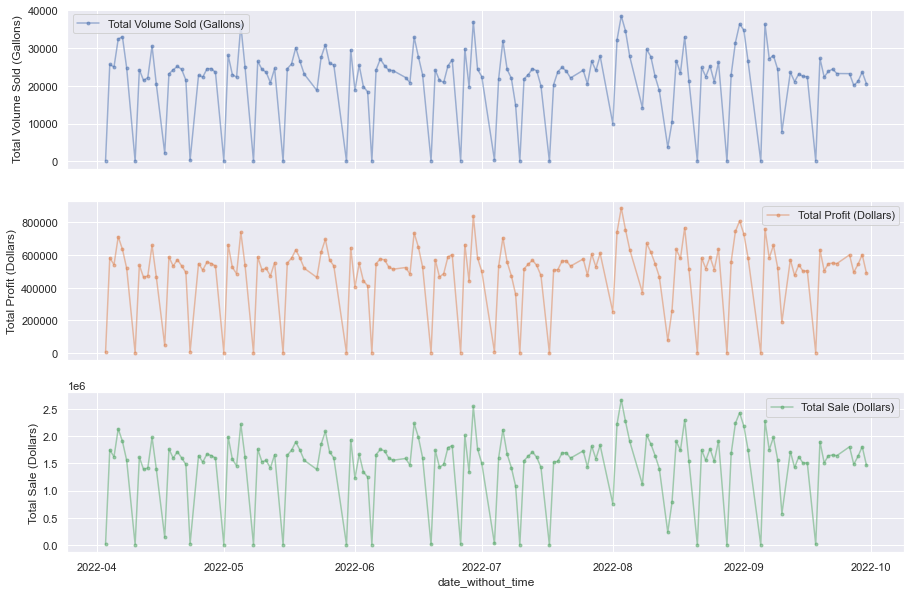

In [37]:
# Time series graph between 3 different columns that are using for pridicting model
cols_plot = ['Total Volume Sold (Gallons)','Total Profit (Dollars)','Total Sale (Dollars)']
ax1,ax2,ax3 = df_time_analysis[cols_plot].plot(marker='.', alpha=0.5, figsize=(15, 10), subplots=True)
ax1.set_ylabel('Total Volume Sold (Gallons)')
ax2.set_ylabel('Total Profit (Dollars)')
ax3.set_ylabel('Total Sale (Dollars)')

### By doing a time series analysis, I observed that the Total Volume Sold (Gallons), Total Sales (Dollars), and Total Profit (Dollars) gained by vendors all these are following a similar pattern. And on Sundays, all of them reaching to its minima.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1320163 entries, 0 to 1321868
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Invoice/Item Number    1320163 non-null  object 
 1   Date                   1320163 non-null  object 
 2   Store Number           1320163 non-null  int64  
 3   Store Name             1320163 non-null  object 
 4   Address                1320163 non-null  object 
 5   City                   1320163 non-null  object 
 6   Zip Code               1320163 non-null  float64
 7   County                 1320163 non-null  object 
 8   Category               1320163 non-null  int64  
 9   Category Name          1320163 non-null  object 
 10  Vendor Number          1320163 non-null  int64  
 11  Vendor Name            1320163 non-null  object 
 12  Item Number            1320163 non-null  int64  
 13  Item Description       1320163 non-null  object 
 14  Pack              

In [39]:
df

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,County,Category,Category Name,...,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Profit (Dollars),date_without_time,month
0,INV-46142600002,04/03/2022,3842,BANCROFT LIQUOR STORE,107 N PORTLAND ST PO BX 222,BANCROFT,50517.0,KOSSUTH,1081200,CREAM LIQUEURS,...,1000,17.00,25.50,6,153.00,6.00,1.58,51.00,2022-04-03,Apr
1,INV-46142600006,04/03/2022,3842,BANCROFT LIQUOR STORE,107 N PORTLAND ST PO BX 222,BANCROFT,50517.0,KOSSUTH,1031100,AMERICAN VODKAS,...,1000,13.17,19.76,24,474.24,24.00,6.34,158.16,2022-04-03,Apr
2,INV-46142100001,04/03/2022,5941,PRIME MART - CEDAR FALLS,2728 CENTER ST,CEDAR FALLS,50613.0,BLACK HAWK,1012200,SCOTCH WHISKIES,...,750,150.00,225.00,2,450.00,1.50,0.39,150.00,2022-04-03,Apr
3,INV-46142400009,04/03/2022,4129,CYCLONE LIQUORS,626 LINCOLN WAY,AMES,50010.0,STORY,1032100,IMPORTED VODKAS,...,1000,15.16,22.74,60,1364.40,60.00,15.85,454.80,2022-04-03,Apr
4,INV-46142400014,04/03/2022,4129,CYCLONE LIQUORS,626 LINCOLN WAY,AMES,50010.0,STORY,1041100,AMERICAN DRY GINS,...,1000,7.33,11.00,4,44.00,4.00,1.05,14.68,2022-04-03,Apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321864,INV-51683600088,09/30/2022,2591,HY-VEE WINE AND SPIRITS / ATLANTIC,1602 E 7TH ST,ATLANTIC,50022.0,CASS,1062300,AGED DARK RUM,...,750,15.00,22.50,4,90.00,3.00,0.79,30.00,2022-09-30,Sep
1321865,INV-51722000007,09/30/2022,2566,HY-VEE FOOD STORE / KNOXVILLE,813 N LINCOLN STE 1,KNOXVILLE,50138.0,MARION,1081000,AMERICAN CORDIALS & LIQUEURS,...,750,14.00,21.00,12,252.00,9.00,2.37,84.00,2022-09-30,Sep
1321866,INV-51709300007,09/30/2022,4318,FAREWAY STORES #841 / RED OAK,811 BROADWAY,RED OAK,51566.0,MONTGOMERY,1701100,TEMPORARY & SPECIALTY PACKAGES,...,750,45.00,67.50,3,202.50,2.25,0.59,67.50,2022-09-30,Sep
1321867,INV-51721400030,09/30/2022,4011,JIM AND CHARLIES AFFILIATED,121 NORTH CLINTON,ALBIA,52531.0,MONROE,1011100,BLENDED WHISKIES,...,1000,7.17,10.76,3,32.28,3.00,0.79,10.77,2022-09-30,Sep


In [40]:
# saving csv file to reuse file in model building
df.to_csv('cleaned_Iowa_Liquor_Sales.csv',index = False)    